In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split

## Data Exploration and Pre-processing

253,680 responses from cleaned BRFSS (telephone survey in the US) data 2015

Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1?resource=download

In the below, diabetes (label 2) and pre-diabetes (label 1) are grouped together as they both may require medication.

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
97519,0.0,1.0,1.0,1.0,36.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0
228967,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
153844,1.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,10.0,4.0,3.0
226440,1.0,1.0,1.0,1.0,28.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,9.0,6.0,5.0
197457,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,6.0


In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df = df.dropna()

In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


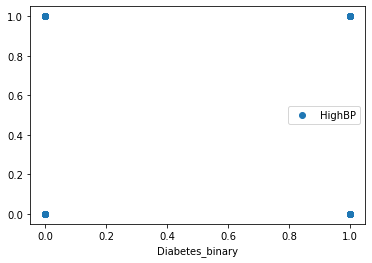

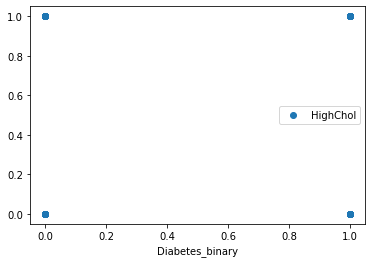

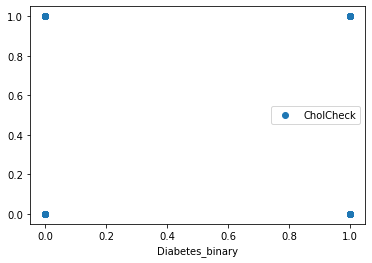

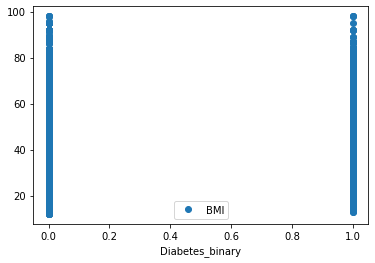

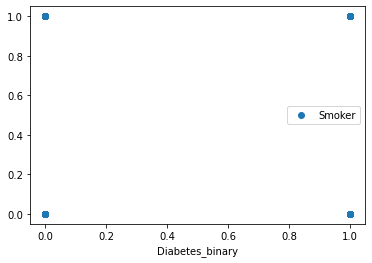

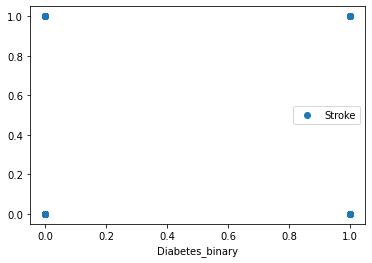

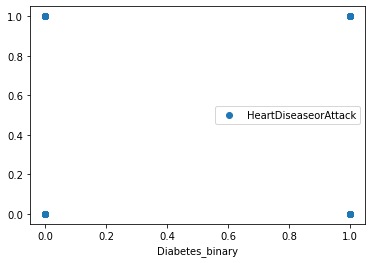

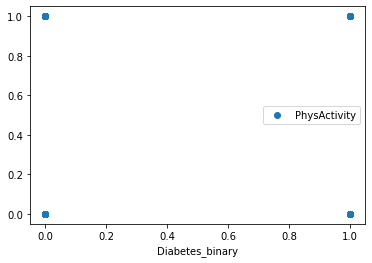

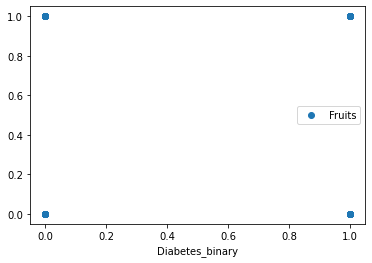

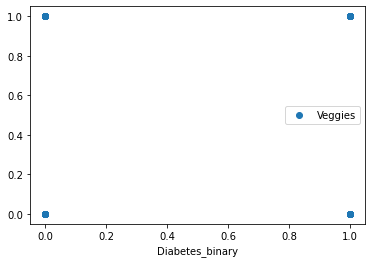

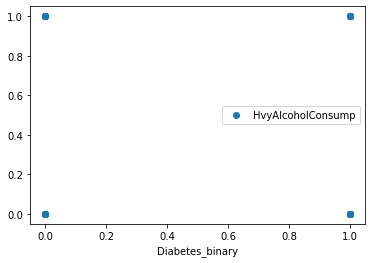

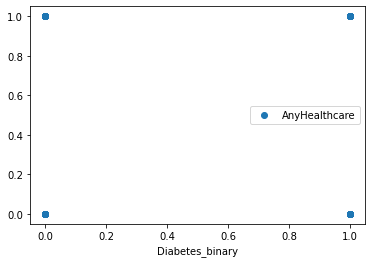

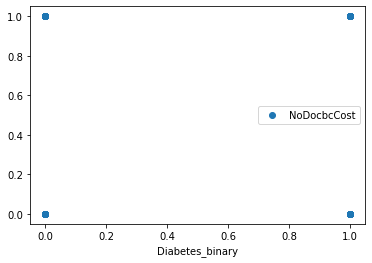

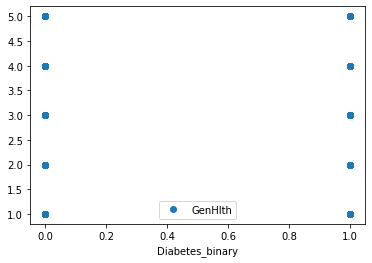

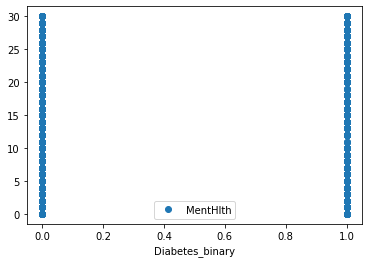

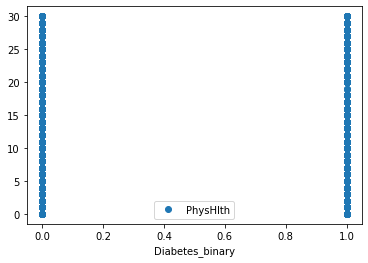

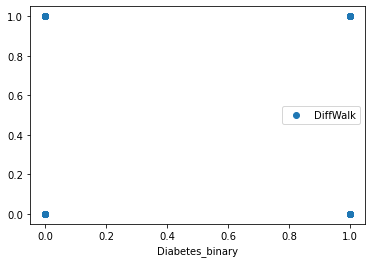

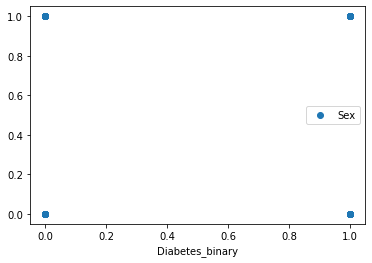

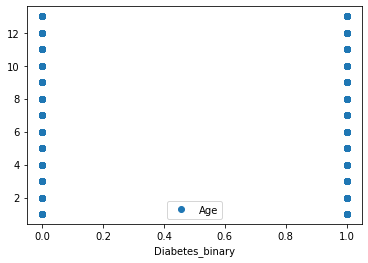

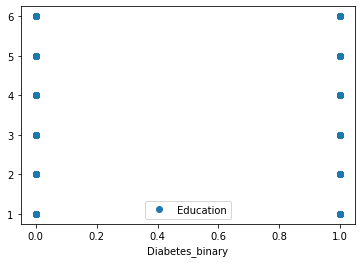

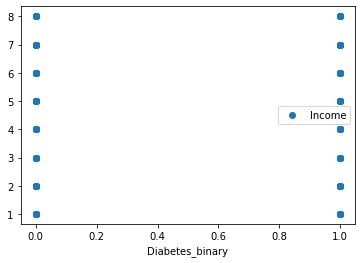

In [8]:
columns = list(df.columns)
columns.remove('Diabetes_binary')


for feature in columns:
    df.plot(x='Diabetes_binary', y=feature , style='o')

<AxesSubplot:>

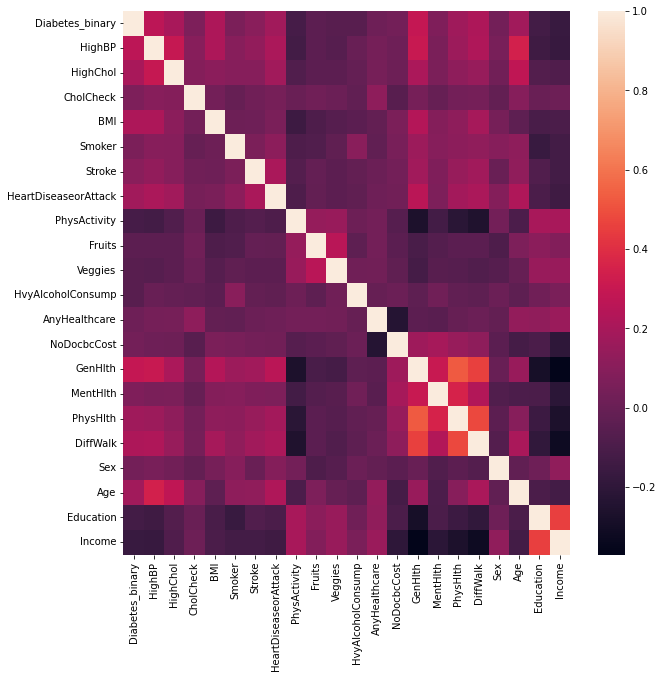

In [9]:
# Creating pearson correlation matrix and ploting it
cor_mat = df.corr(method= 'pearson')
fig = plt.figure(figsize=(10,10))
sns.heatmap(cor_mat)

## Split for testing

In [10]:
y = df['Diabetes_binary']
X = df.drop(['Diabetes_binary'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

#### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
# note: top 3 hyperparameters: n_estimators, max_features, max_samples
rf_model = RandomForestClassifier(n_estimators=200, max_features='auto', max_samples=0.9, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.9, n_estimators=200, random_state=42)

In [12]:
predictions = rf_model.predict(X_test)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
rf_model.classes_

array([0., 1.])

In [14]:
rf_model.feature_importances_

array([0.04237379, 0.02630765, 0.00365297, 0.18323783, 0.03326289,
       0.01243151, 0.01792592, 0.02678867, 0.03343255, 0.02662676,
       0.00773834, 0.00861085, 0.01489495, 0.07054946, 0.06463023,
       0.08398397, 0.02415047, 0.02774484, 0.12261083, 0.07027472,
       0.09877081])

In [15]:
rf_model.predict_proba(X_test)

array([[0.96  , 0.04  ],
       [0.863 , 0.137 ],
       [1.    , 0.    ],
       ...,
       [0.815 , 0.185 ],
       [0.6545, 0.3455],
       [0.975 , 0.025 ]])

In [16]:
predictions == y_test

219620     True
132821     True
151862     True
139717     True
239235     True
          ...  
58128      True
99874      True
194090    False
156719    False
186298     True
Name: Diabetes_binary, Length: 25368, dtype: bool

In [17]:
# accuracy
np.sum(np.array(predictions == y_test))/len(y_test)

0.8612030905077263

In [18]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predictions))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, digits=3))

[[21199   675]
 [ 2846   648]]
              precision    recall  f1-score   support

         0.0      0.882     0.969     0.923     21874
         1.0      0.490     0.185     0.269      3494

    accuracy                          0.861     25368
   macro avg      0.686     0.577     0.596     25368
weighted avg      0.828     0.861     0.833     25368



In [19]:
from sklearn.metrics import roc_auc_score

#print ROC_AUC
print('ROC_AUC: ', roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

ROC_AUC:  0.8044470061374038


#### Gradient Boosting

In [20]:
# evaluate gradient boosting algorithm for classification
# https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# define the model
gb_model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(gb_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.866 (0.001)


In [21]:
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

In [22]:
gb_model.feature_importances_

array([2.66097284e-01, 7.54864923e-02, 6.63490188e-03, 1.70792592e-01,
       4.70528031e-04, 2.71429138e-03, 2.86486253e-02, 1.95579315e-04,
       2.07751287e-04, 2.22769018e-04, 1.04044564e-02, 1.10559816e-04,
       3.66802644e-04, 2.89292243e-01, 1.34491897e-03, 1.47002613e-03,
       4.62426551e-02, 6.18443369e-03, 7.97029256e-02, 2.01427440e-03,
       1.13958891e-02])

In [23]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

[[21377   497]
 [ 2877   617]]
              precision    recall  f1-score   support

         0.0      0.881     0.977     0.927     21874
         1.0      0.554     0.177     0.268      3494

    accuracy                          0.867     25368
   macro avg      0.718     0.577     0.597     25368
weighted avg      0.836     0.867     0.836     25368



In [24]:
#print ROC_AUC
print('ROC_AUC: ', roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))

ROC_AUC:  0.8329477382536261


#### Neural Network

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from keras.layers import Dropout
from keras.utils import to_categorical

In [26]:
#y_train_onehot = to_categorical(y_train)
#y_test_onehot = to_categorical(y_test)

training model ...


2023-02-08 00:12:52.663869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Train set min loss: 0.4149763286113739
Val set min loss: 0.4010081887245178
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

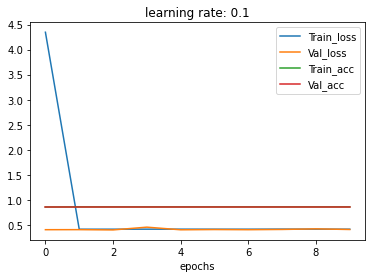

training model ...
Train set min loss: 0.40534770488739014
Val set min loss: 0.40091609954833984
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

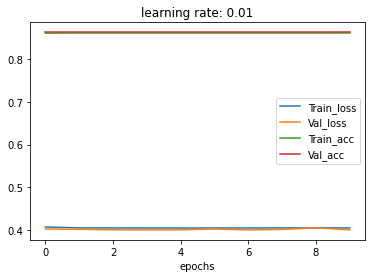

training model ...
Train set min loss: 0.32766979932785034
Val set min loss: 0.3157968521118164
[[21689   185]
 [ 3215   279]]
              precision    recall  f1-score   support

         0.0      0.871     0.992     0.927     21874
         1.0      0.601     0.080     0.141      3494

    accuracy                          0.866     25368
   macro avg      0.736     0.536     0.534     25368
weighted avg      0.834     0.866     0.819     25368



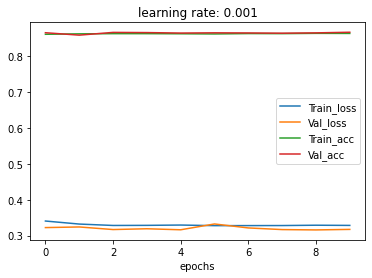

training model ...
Train set min loss: 0.32100793719291687
Val set min loss: 0.31295791268348694
[[21702   172]
 [ 3240   254]]
              precision    recall  f1-score   support

         0.0      0.870     0.992     0.927     21874
         1.0      0.596     0.073     0.130      3494

    accuracy                          0.865     25368
   macro avg      0.733     0.532     0.528     25368
weighted avg      0.832     0.865     0.817     25368



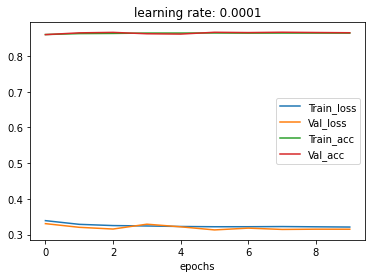

training model ...
Train set min loss: 0.32210850715637207
Val set min loss: 0.31543150544166565
[[21585   289]
 [ 3111   383]]
              precision    recall  f1-score   support

         0.0      0.874     0.987     0.927     21874
         1.0      0.570     0.110     0.184      3494

    accuracy                          0.866     25368
   macro avg      0.722     0.548     0.555     25368
weighted avg      0.832     0.866     0.825     25368



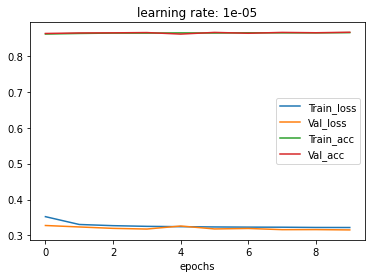

training model ...
Train set min loss: 0.3302277624607086
Val set min loss: 0.3253328502178192
[[21431   443]
 [ 3012   482]]
              precision    recall  f1-score   support

         0.0      0.877     0.980     0.925     21874
         1.0      0.521     0.138     0.218      3494

    accuracy                          0.864     25368
   macro avg      0.699     0.559     0.572     25368
weighted avg      0.828     0.864     0.828     25368



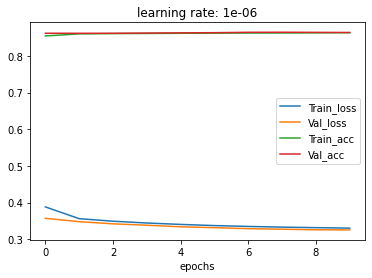

training model ...
Train set min loss: 0.3643019199371338
Val set min loss: 0.3601396679878235
[[21736   138]
 [ 3373   121]]
              precision    recall  f1-score   support

         0.0      0.866     0.994     0.925     21874
         1.0      0.467     0.035     0.064      3494

    accuracy                          0.862     25368
   macro avg      0.666     0.514     0.495     25368
weighted avg      0.811     0.862     0.807     25368



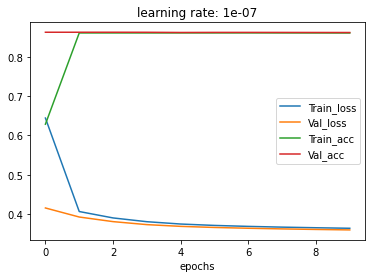

In [28]:
tf.config.run_functions_eagerly(False)
Models={}
Models['learning_rate'] = {}

learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

for lr in learning_rates:
    NN = Sequential()
    NN.add(Dense(21,input_dim = X_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    NN.add(Dense(50, activation='relu'))
    opt = RMSprop(learning_rate= lr, momentum=0.9)    
    NN.add(Dense(1, activation='sigmoid'))
    NN.compile(loss =tf.keras.losses.BinaryCrossentropy(), optimizer=opt, metrics='accuracy')

    Models['learning_rate'][lr]= NN
    tf.keras.backend.clear_session()
    del NN

counter = 0
for i, model_NN in Models['learning_rate'].items():
    print('training model ...')
    history = model_NN.fit(x = X_train, y = y_train, epochs=10, verbose = 0, validation_data=(X_test, y_test))
    print('Train set min loss: {}'.format(min(history.history['loss'])))
    print('Val set min loss: {}'.format(min(history.history['val_loss'])))
    y_pred_NN = 1*(model_NN.predict(X_test) > 0.5)
    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred_NN))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred_NN, digits=3))
    plt.figure()
    plt.title('learning rate: {}'.format(learning_rates[counter]))
    plt.plot(history.history['loss'], label = 'Train_loss')
    plt.plot(history.history['val_loss'], label = 'Val_loss')
    plt.plot(history.history['accuracy'], label = 'Train_acc')
    plt.plot(history.history['val_accuracy'], label = 'Val_acc')
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    counter += 1
    

In [31]:
#print ROC_AUC 
for i, model_NN in Models['learning_rate'].items():
    print('lr: ',i, ';   ROC_AUC: ', roc_auc_score(y_test, model_NN.predict(X_test)))

lr:  0.1 ;   ROC_AUC:  0.5
lr:  0.01 ;   ROC_AUC:  0.5
lr:  0.001 ;   ROC_AUC:  0.8229449782615624
lr:  0.0001 ;   ROC_AUC:  0.8268812183887748
lr:  1e-05 ;   ROC_AUC:  0.8244797217387883
lr:  1e-06 ;   ROC_AUC:  0.8072812840403163
lr:  1e-07 ;   ROC_AUC:  0.7316539098701261


## SMOTEEN

Over-sampling and down-sampling

In [32]:
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [33]:
from collections import Counter

In [34]:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

#### Random Forest

In [35]:
rf_model_resampled = RandomForestClassifier(n_estimators=200, max_features='auto', max_samples=0.9, random_state=42)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)
predictions_resampled = rf_model_resampled.predict(X_test)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predictions_resampled))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions_resampled, digits=3))

[[17320  4554]
 [ 1154  2340]]
              precision    recall  f1-score   support

         0.0      0.938     0.792     0.859     21874
         1.0      0.339     0.670     0.451      3494

    accuracy                          0.775     25368
   macro avg      0.638     0.731     0.655     25368
weighted avg      0.855     0.775     0.802     25368



In [36]:
rf_model_resampled.feature_importances_

array([0.19393393, 0.09996581, 0.0031807 , 0.10469931, 0.02209565,
       0.0050732 , 0.02113385, 0.02480829, 0.01846088, 0.01242322,
       0.00751141, 0.00376122, 0.00547745, 0.18446586, 0.01897704,
       0.02555631, 0.04614202, 0.02410734, 0.09227919, 0.03323697,
       0.05271035])

In [37]:
#print ROC_AUC
print('ROC_AUC: ', roc_auc_score(y_test, rf_model_resampled.predict_proba(X_test)[:,1]))

ROC_AUC:  0.8167692834001301


#### Gradient Boosting

In [38]:
gb_model_resampled = GradientBoostingClassifier()
gb_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = gb_model_resampled.predict(X_test)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_resampled))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_resampled, digits=3))

[[16240  5634]
 [  832  2662]]
              precision    recall  f1-score   support

         0.0      0.951     0.742     0.834     21874
         1.0      0.321     0.762     0.452      3494

    accuracy                          0.745     25368
   macro avg      0.636     0.752     0.643     25368
weighted avg      0.864     0.745     0.781     25368



In [39]:
gb_model_resampled.feature_importances_

array([4.93559745e-01, 8.19685008e-02, 1.54801576e-03, 5.15344169e-02,
       7.60635624e-03, 1.70647919e-04, 1.04221525e-02, 6.02455934e-03,
       6.18341189e-03, 2.62667965e-03, 6.64106381e-03, 7.31529633e-04,
       7.55052381e-04, 2.18567291e-01, 1.94249073e-03, 1.17788523e-05,
       1.29144631e-02, 1.81322977e-02, 5.96429267e-02, 8.98713504e-03,
       1.00294850e-02])

In [40]:
#print ROC_AUC
print('ROC_AUC: ', roc_auc_score(y_test, gb_model_resampled.predict_proba(X_test)[:,1]))

ROC_AUC:  0.8299442613492407


#### Neural Network

training model ...
Train set min loss: 0.4153006374835968
Val set min loss: 0.40157026052474976
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

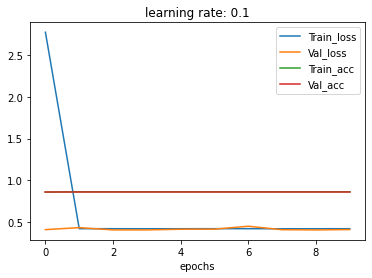

training model ...
Train set min loss: 0.4053903818130493
Val set min loss: 0.4008369743824005
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

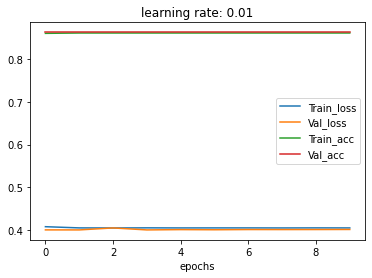

training model ...
Train set min loss: 0.3278539180755615
Val set min loss: 0.3148258328437805
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

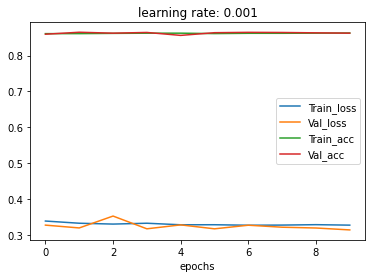

training model ...
Train set min loss: 0.3215339183807373
Val set min loss: 0.3145393133163452
[[21855    19]
 [ 3464    30]]
              precision    recall  f1-score   support

         0.0      0.863     0.999     0.926     21874
         1.0      0.612     0.009     0.017      3494

    accuracy                          0.863     25368
   macro avg      0.738     0.504     0.472     25368
weighted avg      0.829     0.863     0.801     25368



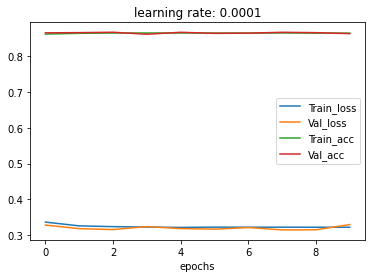

training model ...
Train set min loss: 0.32213741540908813
Val set min loss: 0.3163389265537262
[[21509   365]
 [ 3018   476]]
              precision    recall  f1-score   support

         0.0      0.877     0.983     0.927     21874
         1.0      0.566     0.136     0.220      3494

    accuracy                          0.867     25368
   macro avg      0.721     0.560     0.573     25368
weighted avg      0.834     0.867     0.830     25368



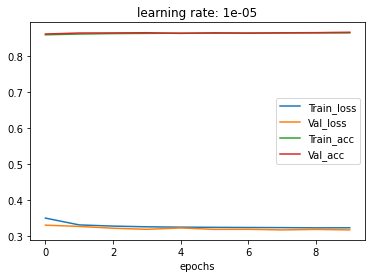

training model ...
Train set min loss: 0.3307393491268158
Val set min loss: 0.3263065218925476
[[21579   295]
 [ 3197   297]]
              precision    recall  f1-score   support

         0.0      0.871     0.987     0.925     21874
         1.0      0.502     0.085     0.145      3494

    accuracy                          0.862     25368
   macro avg      0.686     0.536     0.535     25368
weighted avg      0.820     0.862     0.818     25368



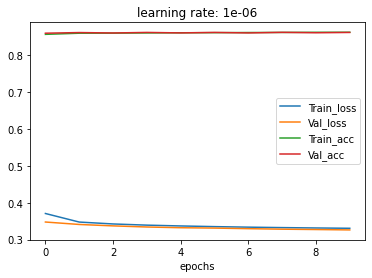

training model ...
Train set min loss: 0.3717561662197113
Val set min loss: 0.3681544363498688
[[21834    40]
 [ 3451    43]]
              precision    recall  f1-score   support

         0.0      0.864     0.998     0.926     21874
         1.0      0.518     0.012     0.024      3494

    accuracy                          0.862     25368
   macro avg      0.691     0.505     0.475     25368
weighted avg      0.816     0.862     0.802     25368



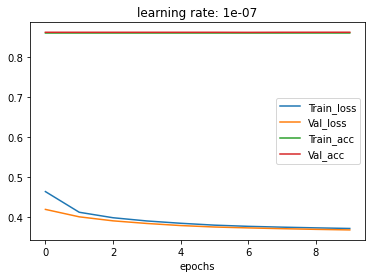

In [41]:
tf.config.run_functions_eagerly(False)

Models_resampled={}
Models_resampled['learning_rate'] = {}

learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

for lr in learning_rates:
    NN = Sequential()
    NN.add(Dense(21,input_dim = X_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    NN.add(Dense(50, activation='relu'))
    opt = RMSprop(learning_rate= lr, momentum=0.9)    
    NN.add(Dense(1, activation='sigmoid'))
    NN.compile(loss =tf.keras.losses.BinaryCrossentropy(), optimizer=opt, metrics='accuracy')
    
    Models_resampled['learning_rate'][lr]= NN
    tf.keras.backend.clear_session()
    del NN

counter = 0
for i, model_NN in Models_resampled['learning_rate'].items():
    print('training model ...')
    history = model_NN.fit(x = X_train, y = y_train, epochs=10, verbose = 0, validation_data=(X_test, y_test))
    print('Train set min loss: {}'.format(min(history.history['loss'])))
    print('Val set min loss: {}'.format(min(history.history['val_loss'])))
    y_pred_NN = 1*(model_NN.predict(X_test)>0.5)
    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred_NN))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred_NN, digits=3))
    plt.figure()
    plt.title('learning rate: {}'.format(learning_rates[counter]))
    plt.plot(history.history['loss'], label = 'Train_loss')
    plt.plot(history.history['val_loss'], label = 'Val_loss')
    plt.plot(history.history['accuracy'], label = 'Train_acc')
    plt.plot(history.history['val_accuracy'], label = 'Val_acc')
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    counter += 1

In [42]:
#print ROC_AUC
for i, model_NN in Models_resampled['learning_rate'].items():
    print('lr: ',i, ';   ROC_AUC: ', roc_auc_score(y_test, model_NN.predict(X_test)))

lr:  0.1 ;   ROC_AUC:  0.5
lr:  0.01 ;   ROC_AUC:  0.5
lr:  0.001 ;   ROC_AUC:  0.8255045065041553
lr:  0.0001 ;   ROC_AUC:  0.8248330684993551
lr:  1e-05 ;   ROC_AUC:  0.823833621387497
lr:  1e-06 ;   ROC_AUC:  0.8044082178730984
lr:  1e-07 ;   ROC_AUC:  0.7083327554455479


## Random Over-sampling

In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#### Random Forest

In [44]:
rf_model_ros = RandomForestClassifier(n_estimators=200, max_features='auto', max_samples=0.9, random_state=42)
rf_model_ros.fit(X_train_ros, y_train_ros)
predictions_ros = rf_model_ros.predict(X_test)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predictions_ros))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions_ros, digits=3))

[[20098  1776]
 [ 2296  1198]]
              precision    recall  f1-score   support

         0.0      0.897     0.919     0.908     21874
         1.0      0.403     0.343     0.370      3494

    accuracy                          0.839     25368
   macro avg      0.650     0.631     0.639     25368
weighted avg      0.829     0.839     0.834     25368



In [45]:
rf_model_ros.feature_importances_

array([0.07839135, 0.03791626, 0.00581284, 0.17355379, 0.02841607,
       0.00984595, 0.01707684, 0.02246918, 0.02811712, 0.02168514,
       0.00872894, 0.00740558, 0.01216042, 0.10157482, 0.05464841,
       0.07085655, 0.02547108, 0.02452179, 0.12766517, 0.05829811,
       0.08538458])

In [46]:
#print ROC_AUC
print('ROC_AUC: ', roc_auc_score(y_test, rf_model_ros.predict_proba(X_test)[:,1]))

ROC_AUC:  0.7999931530110606


#### Gradient Boosting

In [47]:
gb_model_ros = GradientBoostingClassifier()
gb_model_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = gb_model_ros.predict(X_test)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_ros))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_ros, digits=3))

[[15519  6355]
 [  680  2814]]
              precision    recall  f1-score   support

         0.0      0.958     0.709     0.815     21874
         1.0      0.307     0.805     0.444      3494

    accuracy                          0.723     25368
   macro avg      0.632     0.757     0.630     25368
weighted avg      0.868     0.723     0.764     25368



In [48]:
gb_model_ros.feature_importances_

array([3.47652868e-01, 6.54570866e-02, 9.12546097e-03, 1.23670647e-01,
       1.78274435e-04, 1.35598941e-03, 1.45969026e-02, 3.77053305e-04,
       3.28883089e-04, 1.46065313e-04, 9.33048325e-03, 2.04154738e-04,
       1.51730672e-04, 2.83642453e-01, 1.30599597e-03, 9.39083135e-04,
       1.37728222e-02, 7.59577310e-03, 1.06297244e-01, 1.87520967e-03,
       1.19958201e-02])

In [49]:
#print ROC_AUC
print('ROC_AUC: ', roc_auc_score(y_test, gb_model_ros.predict_proba(X_test)[:,1]))

ROC_AUC:  0.8334702578471623


#### Neural Network

training model ...
Train set min loss: 0.4151153266429901
Val set min loss: 0.4009455740451813
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

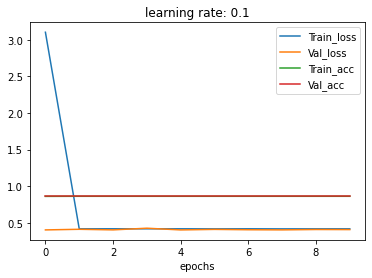

training model ...
Train set min loss: 0.4054153561592102
Val set min loss: 0.4008266031742096
[[21874     0]
 [ 3494     0]]
              precision    recall  f1-score   support

         0.0      0.862     1.000     0.926     21874
         1.0      0.000     0.000     0.000      3494

    accuracy                          0.862     25368
   macro avg      0.431     0.500     0.463     25368
weighted avg      0.744     0.862     0.798     25368



/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suenchihang/opt/anaconda3/envs/rosetta_rl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

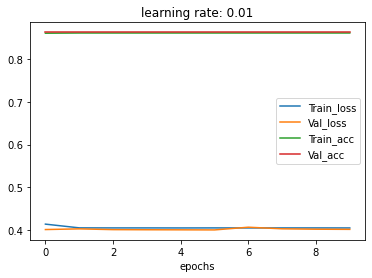

training model ...
Train set min loss: 0.3269948363304138
Val set min loss: 0.31750163435935974
[[20446  1428]
 [ 2270  1224]]
              precision    recall  f1-score   support

         0.0      0.900     0.935     0.917     21874
         1.0      0.462     0.350     0.398      3494

    accuracy                          0.854     25368
   macro avg      0.681     0.643     0.658     25368
weighted avg      0.840     0.854     0.846     25368



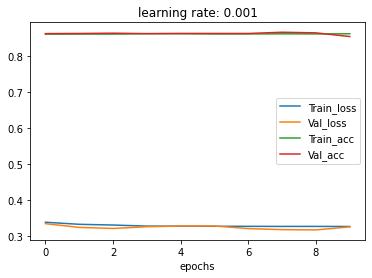

training model ...
Train set min loss: 0.3213143050670624
Val set min loss: 0.3162379562854767
[[21592   282]
 [ 3115   379]]
              precision    recall  f1-score   support

         0.0      0.874     0.987     0.927     21874
         1.0      0.573     0.108     0.182      3494

    accuracy                          0.866     25368
   macro avg      0.724     0.548     0.555     25368
weighted avg      0.833     0.866     0.825     25368



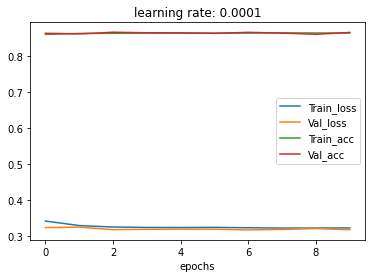

training model ...
Train set min loss: 0.3223300576210022
Val set min loss: 0.31693071126937866
[[21226   648]
 [ 2766   728]]
              precision    recall  f1-score   support

         0.0      0.885     0.970     0.926     21874
         1.0      0.529     0.208     0.299      3494

    accuracy                          0.865     25368
   macro avg      0.707     0.589     0.612     25368
weighted avg      0.836     0.865     0.839     25368



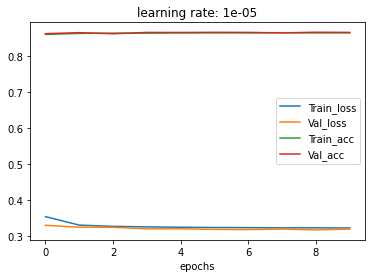

training model ...
Train set min loss: 0.3425426781177521
Val set min loss: 0.3372867703437805
[[21660   214]
 [ 3274   220]]
              precision    recall  f1-score   support

         0.0      0.869     0.990     0.925     21874
         1.0      0.507     0.063     0.112      3494

    accuracy                          0.863     25368
   macro avg      0.688     0.527     0.519     25368
weighted avg      0.819     0.863     0.813     25368



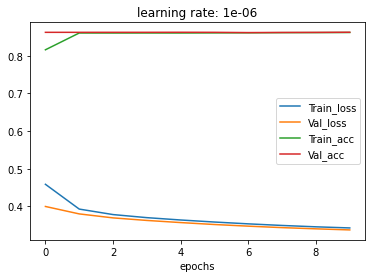

training model ...
Train set min loss: 0.37855643033981323
Val set min loss: 0.373287171125412
[[21858    16]
 [ 3476    18]]
              precision    recall  f1-score   support

         0.0      0.863     0.999     0.926     21874
         1.0      0.529     0.005     0.010      3494

    accuracy                          0.862     25368
   macro avg      0.696     0.502     0.468     25368
weighted avg      0.817     0.862     0.800     25368



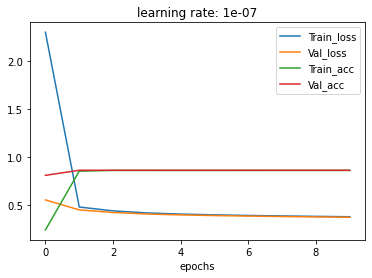

In [50]:
tf.config.run_functions_eagerly(False)

Models_ros={}
Models_ros['learning_rate'] = {}

learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

for lr in learning_rates:
    NN = Sequential()
    NN.add(Dense(21,input_dim = X_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    NN.add(Dense(50, activation='relu'))
    opt = RMSprop(learning_rate= lr, momentum=0.9)    
    NN.add(Dense(1, activation='sigmoid'))
    NN.compile(loss =tf.keras.losses.BinaryCrossentropy(), optimizer=opt, metrics='accuracy')

    Models_ros['learning_rate'][lr]= NN
    tf.keras.backend.clear_session()
    del NN

counter = 0
for i, model_NN in Models_ros['learning_rate'].items():
    print('training model ...')
    history = model_NN.fit(x = X_train, y = y_train, epochs=10, verbose = 0, validation_data=(X_test, y_test))
    print('Train set min loss: {}'.format(min(history.history['loss'])))
    print('Val set min loss: {}'.format(min(history.history['val_loss'])))
    y_pred_NN = 1*(model_NN.predict(X_test)>0.5)
    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred_NN))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred_NN, digits=3))
    plt.figure()
    plt.title('learning rate: {}'.format(learning_rates[counter]))
    plt.plot(history.history['loss'], label = 'Train_loss')
    plt.plot(history.history['val_loss'], label = 'Val_loss')
    plt.plot(history.history['accuracy'], label = 'Train_acc')
    plt.plot(history.history['val_accuracy'], label = 'Val_acc')
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    counter += 1

In [51]:
#print ROC_AUC
for i, model_NN in Models_ros['learning_rate'].items():
    print('lr: ',i, ';   ROC_AUC: ', roc_auc_score(y_test, model_NN.predict(X_test)))

lr:  0.1 ;   ROC_AUC:  0.5
lr:  0.01 ;   ROC_AUC:  0.5
lr:  0.001 ;   ROC_AUC:  0.8250915936875081
lr:  0.0001 ;   ROC_AUC:  0.8251921330779357
lr:  1e-05 ;   ROC_AUC:  0.8230470157988153
lr:  1e-06 ;   ROC_AUC:  0.7827813890021841
lr:  1e-07 ;   ROC_AUC:  0.6971576007020276


## Sensitivity and Specificity

In [58]:
def metrics_dict(confusion_matrix):
    # follow confusion matrix format of sklearn
    metrics={}
    metrics['TN'] = confusion_matrix[0,0]
    metrics['FP'] = confusion_matrix[0,1]
    metrics['FN'] = confusion_matrix[1,0]
    metrics['TP'] = confusion_matrix[1,1]
    metrics['sensitivity']= metrics['TP']/(metrics['TP']+metrics['FN'])
    metrics['specificity']= metrics['TN']/(metrics['TN']+metrics['FP'])
    metrics['precision'] = metrics['TP']/(metrics['TP']+metrics['FP'])
    metrics['recall'] = metrics['sensitivity']
    return metrics 

In [59]:
rf_m = metrics_dict(metrics.confusion_matrix(y_test, predictions))
rf_m_resampled = metrics_dict(metrics.confusion_matrix(y_test, predictions_resampled))
rf_m_ros = metrics_dict(metrics.confusion_matrix(y_test, predictions_ros))
gb_m = metrics_dict(metrics.confusion_matrix(y_test, y_pred))
gb_m_resampled = metrics_dict(metrics.confusion_matrix(y_test, y_pred_resampled))
gb_m_ros = metrics_dict(metrics.confusion_matrix(y_test, y_pred_ros))

NN_m = {}
for i, model_NN in Models['learning_rate'].items():
    y_pred_NN = 1*(model_NN.predict(X_test)>0.5)
    NN_m[i] = metrics_dict(metrics.confusion_matrix(y_test, y_pred_NN))

NN_m_resampled = {}
for i, model_NN in Models_resampled['learning_rate'].items():
    y_pred_NN = 1*(model_NN.predict(X_test)>0.5)
    NN_m_resampled[i] = metrics_dict(metrics.confusion_matrix(y_test, y_pred_NN))

NN_m_ros = {}
for i, model_NN in Models_ros['learning_rate'].items():
    y_pred_NN = 1*(model_NN.predict(X_test)>0.5)
    NN_m_ros[i] = metrics_dict(metrics.confusion_matrix(y_test, y_pred_NN))

/var/folders/wz/clvs5gsd7jl5jxf044nvdvw00000gn/T/ipykernel_18714/3858091586.py:10: RuntimeWarning: invalid value encountered in long_scalars
  metrics['precision'] = metrics['TP']/(metrics['TP']+metrics['FP'])
/var/folders/wz/clvs5gsd7jl5jxf044nvdvw00000gn/T/ipykernel_18714/3858091586.py:10: RuntimeWarning: invalid value encountered in long_scalars
  metrics['precision'] = metrics['TP']/(metrics['TP']+metrics['FP'])
/var/folders/wz/clvs5gsd7jl5jxf044nvdvw00000gn/T/ipykernel_18714/3858091586.py:10: RuntimeWarning: invalid value encountered in long_scalars
  metrics['precision'] = metrics['TP']/(metrics['TP']+metrics['FP'])
/var/folders/wz/clvs5gsd7jl5jxf044nvdvw00000gn/T/ipykernel_18714/3858091586.py:10: RuntimeWarning: invalid value encountered in long_scalars
  metrics['precision'] = metrics['TP']/(metrics['TP']+metrics['FP'])
/var/folders/wz/clvs5gsd7jl5jxf044nvdvw00000gn/T/ipykernel_18714/3858091586.py:10: RuntimeWarning: invalid value encountered in long_scalars
  metrics['precisio

In [60]:
rf_m

{'TN': 21199,
 'FP': 675,
 'FN': 2846,
 'TP': 648,
 'sensitivity': 0.18546078992558673,
 'specificity': 0.9691414464661242,
 'precision': 0.4897959183673469,
 'recall': 0.18546078992558673}

In [61]:
def print_sens_spec(metrics):
    print('ss_mean: {:.3f};'.format((metrics['sensitivity']+metrics['specificity'])/2),'sensitivity: {:.3f};'.format(metrics['sensitivity']),' specificity: {:.3f}'.format(metrics['specificity']))

In [62]:
print_sens_spec(rf_m)

ss_mean: 0.577; sensitivity: 0.185;  specificity: 0.969


In [63]:
print_sens_spec(rf_m_resampled)

ss_mean: 0.731; sensitivity: 0.670;  specificity: 0.792


In [64]:
print_sens_spec(rf_m_ros)

ss_mean: 0.631; sensitivity: 0.343;  specificity: 0.919


In [65]:
print_sens_spec(gb_m)

ss_mean: 0.577; sensitivity: 0.177;  specificity: 0.977


In [66]:
print_sens_spec(gb_m_resampled)

ss_mean: 0.752; sensitivity: 0.762;  specificity: 0.742


In [67]:
print_sens_spec(gb_m_ros)

ss_mean: 0.757; sensitivity: 0.805;  specificity: 0.709


In [68]:
for i, m_dict in NN_m.items():
    print('lr: ',i)
    print_sens_spec(m_dict)

lr:  0.1
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.01
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.001
ss_mean: 0.536; sensitivity: 0.080;  specificity: 0.992
lr:  0.0001
ss_mean: 0.532; sensitivity: 0.073;  specificity: 0.992
lr:  1e-05
ss_mean: 0.548; sensitivity: 0.110;  specificity: 0.987
lr:  1e-06
ss_mean: 0.559; sensitivity: 0.138;  specificity: 0.980
lr:  1e-07
ss_mean: 0.514; sensitivity: 0.035;  specificity: 0.994


In [69]:
for i, m_dict in NN_m_resampled.items():
    print('lr: ',i)
    print_sens_spec(m_dict)

lr:  0.1
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.01
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.001
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.0001
ss_mean: 0.504; sensitivity: 0.009;  specificity: 0.999
lr:  1e-05
ss_mean: 0.560; sensitivity: 0.136;  specificity: 0.983
lr:  1e-06
ss_mean: 0.536; sensitivity: 0.085;  specificity: 0.987
lr:  1e-07
ss_mean: 0.505; sensitivity: 0.012;  specificity: 0.998


In [70]:
for i, m_dict in NN_m_ros.items():
    print('lr: ',i)
    print_sens_spec(m_dict)

lr:  0.1
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.01
ss_mean: 0.500; sensitivity: 0.000;  specificity: 1.000
lr:  0.001
ss_mean: 0.643; sensitivity: 0.350;  specificity: 0.935
lr:  0.0001
ss_mean: 0.548; sensitivity: 0.108;  specificity: 0.987
lr:  1e-05
ss_mean: 0.589; sensitivity: 0.208;  specificity: 0.970
lr:  1e-06
ss_mean: 0.527; sensitivity: 0.063;  specificity: 0.990
lr:  1e-07
ss_mean: 0.502; sensitivity: 0.005;  specificity: 0.999


#### Tuning Gradient Boosting for SMOTE-ENN

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.05, 0.01]}

# Create the Gradient Boosting classifier
gbc = GradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Train the final model using the best hyperparameters
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tune = best_gbc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_tune)
print("Accuracy:", accuracy)
# print other metrics
gb_m_tune = metrics_dict(metrics.confusion_matrix(y_test, y_pred_tune))
print_sens_spec(gb_m_tune)

Accuracy: 0.8675890886155787


AttributeError: 'dict' object has no attribute 'confusion_matrix'

In [73]:
from sklearn import metrics
# print other metrics
gb_m_tune = metrics_dict(metrics.confusion_matrix(y_test, y_pred_tune))
print_sens_spec(gb_m_tune)

ss_mean: 0.566; sensitivity: 0.151;  specificity: 0.982


#### Random Forest accuracy

In [74]:
accuracy_score(y_test, predictions)

0.8612030905077263

In [75]:
accuracy_score(y_test, predictions_resampled)

0.7749921160517187

In [76]:
accuracy_score(y_test, predictions_ros)

0.8394828129927467

#### Gradient Boosting accuracy

In [77]:
accuracy_score(y_test, y_pred)

0.8669977924944813

In [78]:
accuracy_score(y_test, y_pred_resampled)

0.7451119520655944

In [79]:
accuracy_score(y_test, y_pred_ros)

0.722682119205298

#### Neural Network accuracy

In [80]:
for i, m_dict in NN_m.items():
    print('lr: ',i, '; accuracy: {:.3f}'.format((m_dict['TP']+m_dict['TN'])/(m_dict['TP']+m_dict['TN']+m_dict['FP']+m_dict['FN'])))

lr:  0.1 ; accuracy: 0.862
lr:  0.01 ; accuracy: 0.862
lr:  0.001 ; accuracy: 0.866
lr:  0.0001 ; accuracy: 0.865
lr:  1e-05 ; accuracy: 0.866
lr:  1e-06 ; accuracy: 0.864
lr:  1e-07 ; accuracy: 0.862


##### with SMOTE-ENN resampling

In [81]:
for i, m_dict in NN_m_resampled.items():
    print('lr: ',i, '; accuracy: {:.3f}'.format((m_dict['TP']+m_dict['TN'])/(m_dict['TP']+m_dict['TN']+m_dict['FP']+m_dict['FN'])))

lr:  0.1 ; accuracy: 0.862
lr:  0.01 ; accuracy: 0.862
lr:  0.001 ; accuracy: 0.862
lr:  0.0001 ; accuracy: 0.863
lr:  1e-05 ; accuracy: 0.867
lr:  1e-06 ; accuracy: 0.862
lr:  1e-07 ; accuracy: 0.862


##### with random over-sampling

In [82]:
for i, m_dict in NN_m_ros.items():
    print('lr: ',i, '; accuracy: {:.3f}'.format((m_dict['TP']+m_dict['TN'])/(m_dict['TP']+m_dict['TN']+m_dict['FP']+m_dict['FN'])))

lr:  0.1 ; accuracy: 0.862
lr:  0.01 ; accuracy: 0.862
lr:  0.001 ; accuracy: 0.854
lr:  0.0001 ; accuracy: 0.866
lr:  1e-05 ; accuracy: 0.865
lr:  1e-06 ; accuracy: 0.863
lr:  1e-07 ; accuracy: 0.862


## Conclusion

Based on average of sensitivity and specificity (instead of accuracy), Gradient Boosting with random sampling is the best, followed by Gradient Boosting with SMOTE-ENN. It is noted that when neural network is relatively simple and not subject to rigorous tuning, its performance can be worse than gradient boosting. 

PS: the loss function is not customised to the evaluation metric (average of sensitivity and specificity). Further improvement can be made by customizing loss function and more tuning.

In [84]:
# save the model to disk
import pickle
filename = 'final_diabetes_model.sav'
pickle.dump(gb_model_ros, open(filename, 'wb'))

In [85]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))